# Fetch Machine Learning Task Solution

### Importing the necessary tools needed for the challenge

In [6]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

### Read The Data

In [7]:
current_dir = os.getcwd()
print(current_dir)
os.chdir("../data/")
data_dir = os.getcwd()

data = "data_daily.csv"

c:\Users\RISHABH\Desktop\PROJECTS\Fetch-ML\data-analysis and preprocessing


In [8]:
df = pd.read_csv(data_dir+'\\' + data)

### Data Analysis and Pre-Processing

**Note:** Since the data only consists of dates and reciept numbers there's nothing much to explore.

In [9]:
df.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   # Date         365 non-null    object
 1   Receipt_Count  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [11]:
df.describe()

,Receipt_Count
count,3.650000e+02
mean,8.826566e+06
std,7.820089e+05
min,7.095414e+06
25%,8.142874e+06
50%,8.799249e+06
75%,9.476970e+06
max,1.073886e+07


### Extracting Features from dates

In [12]:


df["date"] = pd.to_datetime(df["# Date"])
df['week_of_year'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter
df['year'] = df['date'].dt.year  
df['month'] = df['date'].dt.month 
df['day_of_week'] = df['date'].dt.dayofweek 
df['year_month'] = df['date'].dt.strftime('%Y%m').astype(int)
df.drop(["# Date", "date"], axis=1, inplace=True)

df.head()

,Receipt_Count,week_of_year,quarter,year,month,day_of_week,year_month
0,7564766,53,1,2021,1,4,202101
1,7455524,53,1,2021,1,5,202101
2,7095414,53,1,2021,1,6,202101
3,7666163,1,1,2021,1,0,202101
4,7771289,1,1,2021,1,1,202101


In [13]:
X = df.drop(columns=['Receipt_Count'])
y = df['Receipt_Count']

In [14]:
X["week_of_year"] = X["week_of_year"].astype("int32")

### Model Creation and Training with 5 Folds

#### Creating a neural network with 2-Dense Layers

In [21]:
def create_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),  
        Dense(20, activation='relu'),  
        Dropout(0.2),  
        Dense(20, activation='relu'),  
        Dropout(0.2),  
        Dense(1)  
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')  # Use appropriate loss for regression
    return model

kf = KFold(n_splits=5, shuffle=True, random_state=42)


model = create_model(X.shape[1])  

rmse_scores = []

train_loss = []
val_loss = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=0)
    train_loss.append(model.evaluate(X_train, y_train, verbose=0))
    val_loss.append(model.evaluate(X_val, y_val, verbose=0))




### Ploting Model's loss on both training and validation data

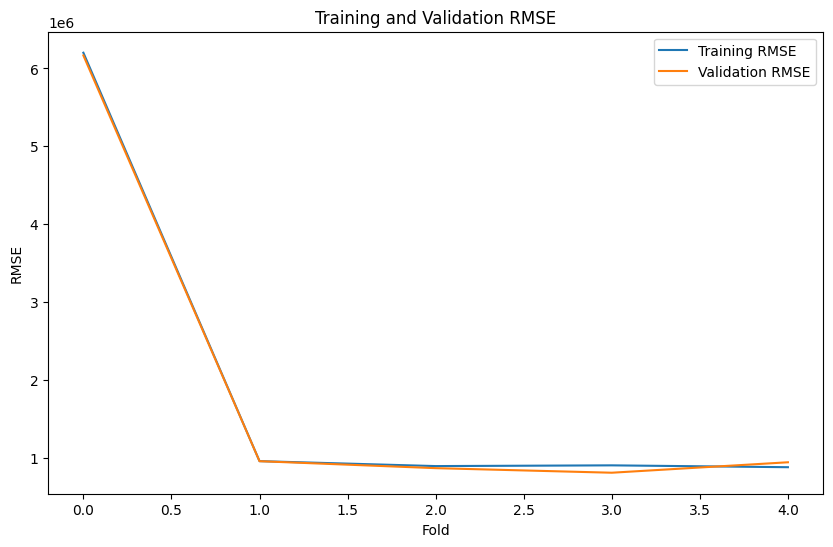

Mean RMSE (Training): 1966201.7690565966
Mean RMSE (Validation): 1947569.834851453


In [22]:
rmse_train = np.sqrt(np.array(train_loss))
rmse_val = np.sqrt(np.array(val_loss))

plt.figure(figsize=(10, 6))
plt.plot(rmse_train, label='Training RMSE')
plt.plot(rmse_val, label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()
plt.show()

print(f"Mean RMSE (Training): {rmse_train.mean()}")
print(f"Mean RMSE (Validation): {rmse_val.mean()}")

plt.show()

### Saving the model in model directory

In [23]:
os.chdir("../model")

model_path = os.getcwd()

model.save(model_path)

print(f"Model saved successfully to {model_path}")

INFO:tensorflow:Assets written to: c:\Users\RISHABH\Desktop\PROJECTS\Fetch-ML\model\assets


INFO:tensorflow:Assets written to: c:\Users\RISHABH\Desktop\PROJECTS\Fetch-ML\model\assets


Model saved successfully to c:\Users\RISHABH\Desktop\PROJECTS\Fetch-ML\model
